<a href="https://colab.research.google.com/github/Sharugh/sharugh-ML-projects/blob/main/CO2_Emission_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting CO2 Emissions and Energy Consumption Patterns Using Machine Learning: A CCUS Dataset Analysis



In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('/content/owid-co2-data.csv')
data

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [29]:
print(data.head())
print(data.info())
print(data.describe())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.157   

In [28]:
data.isnull().sum()

country                            0
year                               0
iso_code                        7867
population                      8001
gdp                            32204
                               ...  
temperature_change_from_n2o     9575
total_ghg                      41061
total_ghg_excluding_lucf       41061
trade_co2                      43017
trade_co2_share                43018
Length: 79, dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
data.fillna(method='bfill',inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data.columns:
    data[i]=encoder.fit_transform(data[i])

In [35]:
corr=data.corr()
corr

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
country,1.000000,0.021595,0.860568,0.051823,0.132007,0.021315,0.015767,0.014735,0.010962,-0.051795,...,-0.054197,-0.009248,0.033185,0.046408,0.038816,0.036090,0.046044,0.066343,0.032942,0.123141
year,0.021595,1.000000,0.033620,0.154077,0.308226,0.332193,0.361099,0.364592,0.125136,-0.122581,...,-0.100223,-0.166924,0.167893,0.164700,0.173566,0.149466,-0.078980,-0.070742,0.036454,0.028014
iso_code,0.860568,0.033620,1.000000,-0.011826,0.039025,-0.042118,-0.050253,-0.043493,-0.013521,-0.027207,...,-0.026485,-0.038291,0.027352,0.041282,0.033044,0.034500,-0.042036,-0.026009,-0.080627,0.066564
population,0.051823,0.154077,-0.011826,1.000000,0.558730,0.470764,0.263092,0.576542,0.314363,-0.028560,...,0.170563,0.501023,0.239631,0.235867,0.249324,0.191309,0.741112,0.737081,0.015267,-0.075462
gdp,0.132007,0.308226,0.039025,0.558730,1.000000,0.442402,0.446732,0.485534,0.221823,-0.095286,...,-0.020481,0.045556,0.056426,0.050862,0.050016,0.049006,0.411419,0.447135,0.166023,-0.016806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temperature_change_from_n2o,0.036090,0.149466,0.034500,0.191309,0.049006,0.496765,0.153293,0.318820,0.260918,-0.030476,...,0.140426,0.397500,0.935162,0.916545,0.908447,1.000000,0.213869,0.218944,-0.041443,-0.084559
total_ghg,0.046044,-0.078980,-0.042036,0.741112,0.411419,0.414156,0.163076,0.546370,0.311023,0.045552,...,0.231043,0.654160,0.267367,0.272632,0.285161,0.213869,1.000000,0.969104,-0.043185,-0.220327
total_ghg_excluding_lucf,0.066343,-0.070742,-0.026009,0.737081,0.447135,0.436115,0.202433,0.583652,0.324563,0.053074,...,0.233276,0.662195,0.273015,0.278003,0.290882,0.218944,0.969104,1.000000,-0.031607,-0.250307
trade_co2,0.032942,0.036454,-0.080627,0.015267,0.166023,0.086858,0.119222,0.029689,-0.024892,0.009979,...,-0.210178,-0.157504,-0.074958,-0.039816,-0.051739,-0.041443,-0.043185,-0.031607,1.000000,0.650042


In [36]:
features = ['population', 'gdp', 'cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']
target = 'co2'

X = data[features]
y = data[target]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1618064.4569896087
R^2 Score: 0.9243890994529119


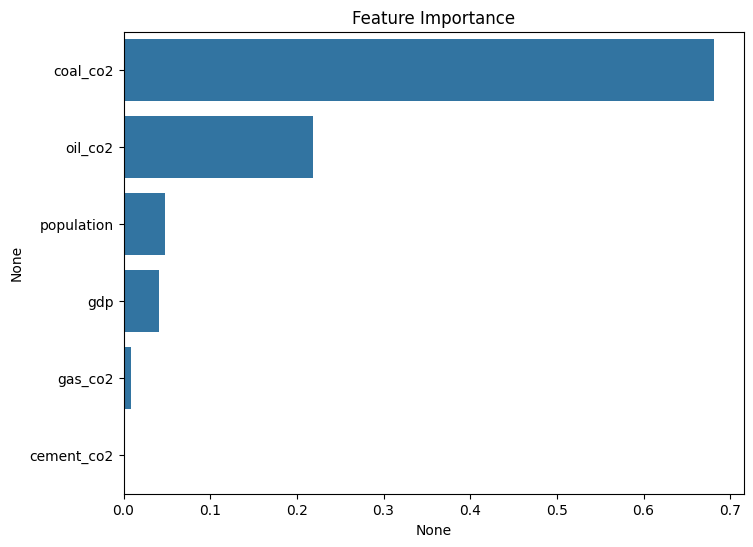

In [40]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

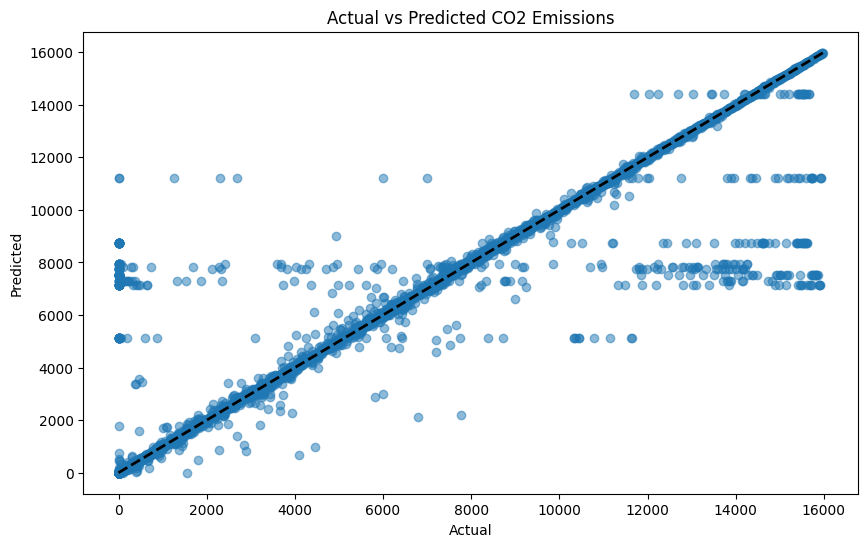

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 150}
Best R^2 score: 0.9294234617493874


In [44]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Tuned Mean Squared Error: {mse}')
print(f'Tuned R^2 Score: {r2}')


Tuned Mean Squared Error: 1615003.107297856
Tuned R^2 Score: 0.9245321539561383


In [45]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_model = HistGradientBoostingRegressor(random_state=42)
hist_model.fit(X_train, y_train)

y_pred_hist = hist_model.predict(X_test)

mse_hist = mean_squared_error(y_test, y_pred_hist)
r2_hist = r2_score(y_test, y_pred_hist)

print(f'Mean Squared Error (HistGradientBoosting): {mse_hist}')
print(f'R^2 Score (HistGradientBoosting): {r2_hist}')

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean Squared Error (HistGradientBoosting): 1661141.151833724
R^2 Score (HistGradientBoosting): 0.9223761588214766


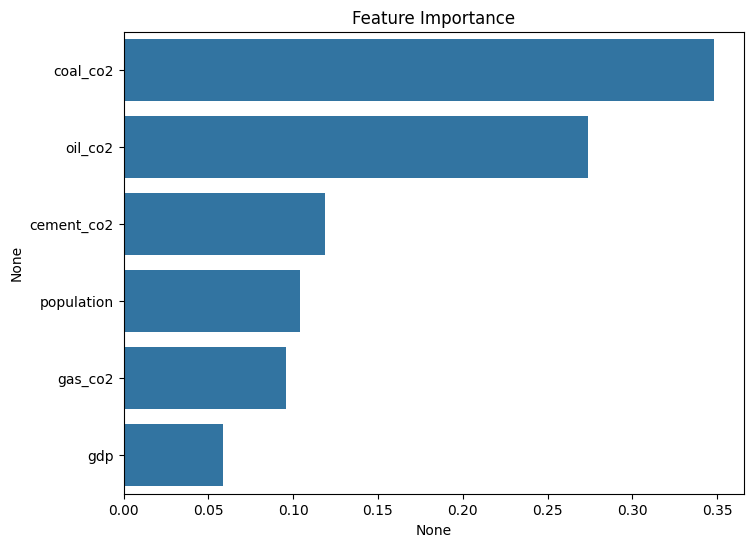

In [46]:
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()